<a href="https://colab.research.google.com/github/benjaminutter/IDS/blob/Project4/Problem2R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing and reading the data:

In [20]:
library(readr)

# Github URL
url <- "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"

# read data from the URL
data <- read.csv(url)

Sorting by saturated fat and showing five foods with highest saturated fat:

In [21]:
# sort in descending order and show top 5
top_sfat_foods <- head(data[order(data$saturated_fat, decreasing = TRUE), ], 5)

# print top 5
print(top_sfat_foods)


                                 food.item weight_in_grams saturated_fat
379 CHEESECAKE                    1 CAKE              1110         119.9
536 ICE CREAM; VANLLA; RICH 16% FT1/2 GAL             1188         118.3
459 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE              1108          92.0
582 CREME PIE                     1 PIE                910          90.1
891 LARD                          1 CUP                205          80.4
    cholesterol
379        2053
536         703
459         609
582          46
891         195


The validity of this top 5 may be a little off because of the fact that the measurements of these foods are different. Instead, we should have measured the amount of saturated fat divided by a standard unit.

Creating a new variable saturated fat per gram and sorting by this variable:

In [22]:
# calculating saturated fat per gram
data$sfat_per_g <- data$saturated_fat / data$weight_in_grams

# sort by saturated fat per gram and get top 5
top_sfat_per_g <- head(data[order(data$sfat_per_g, decreasing = TRUE), ], 5)

# print top 5
print(top_sfat_per_g)


                                 food.item weight_in_grams saturated_fat
909 BUTTER; SALTED                1 TBSP                14           7.1
910 BUTTER; UNSALTED              1 TBSP                14           7.1
710 BUTTER; SALTED                1/2 CUP              113          57.1
711 BUTTER; UNSALTED              1/2 CUP              113          57.1
913 BUTTER; SALTED                1 PAT                  5           2.5
    cholesterol sfat_per_g
909          31  0.5071429
910          31  0.5071429
710         247  0.5053097
711         247  0.5053097
913          11  0.5000000


Standardizing saturated fat per gram and showing the outliers:

In [26]:
# standardizing saturated fat per gram
data$sfat_per_g_standard <- scale(data$sfat_per_g)

threshold <- 3
# identifying outliers using threshold
low_outliers <- data$sfat_per_g_standard < threshold
high_outliers <- data[data$sfat_per_g_standard > threshold, ]

# print list of high outliers
print(high_outliers)

# count num of low outliers
num_low_outliers <- sum(low_outliers)

# print num of low outliers
cat("Number of low-end outliers:", num_low_outliers)


                                 food.item weight_in_grams saturated_fat
211 CHOCOLATE; BITTER OT BAKING   1 OZ               28.35           9.0
449 COCONUT; RAW; SHREDDED        1 CUP              80.00          23.8
493 COCONUT; DRIED; SWEETND;SHREDD1 CUP              93.00          29.3
577 COCONUT; RAW; PIECE           1 PIECE            45.00          13.4
710 BUTTER; SALTED                1/2 CUP           113.00          57.1
711 BUTTER; UNSALTED              1/2 CUP           113.00          57.1
891 LARD                          1 CUP             205.00          80.4
899 FATS; COOKING/VEGETBL SHORTENG1 TBSP             13.00           3.3
900 LARD                          1 TBSP             13.00           5.1
908 FATS; COOKING/VEGETBL SHORTENG1 CUP             205.00          51.3
909 BUTTER; SALTED                1 TBSP             14.00           7.1
910 BUTTER; UNSALTED              1 TBSP             14.00           7.1
913 BUTTER; SALTED                1 PAT            

Density plot for saturate fat per gram:

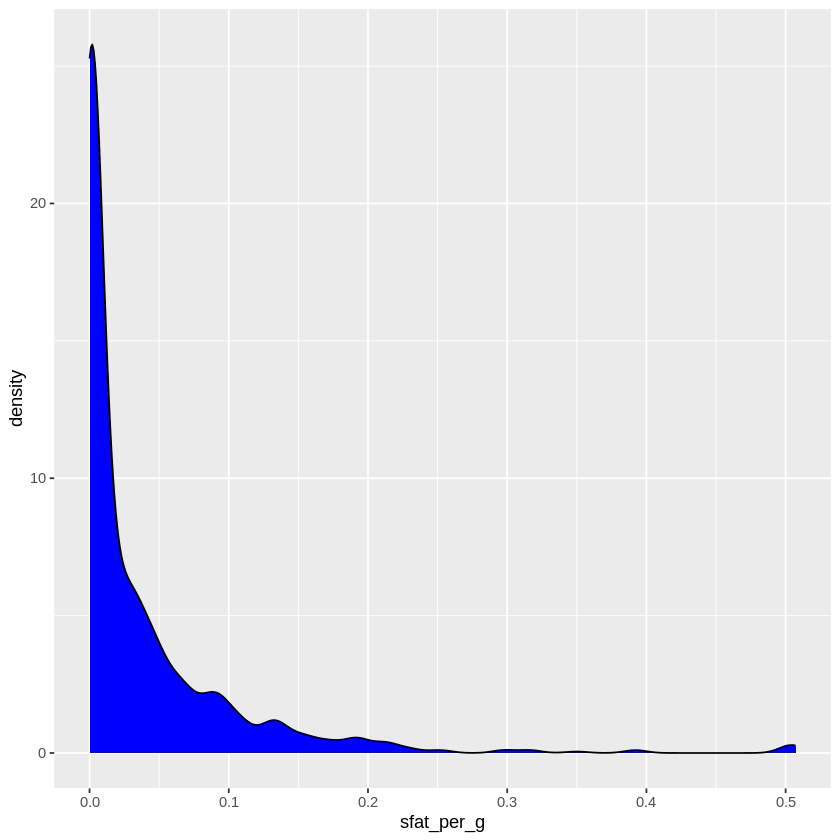

In [28]:
library(ggplot2)

# density plot for saturated fat per gram
ggplot(data, aes(x = sfat_per_g)) +
  geom_density(fill = "blue", color = "black")
